# Исследование пассажирских авиаперевозок

## Общие положения

**Заказчик** — компания «F9»

**Цель исследования** - выявить предпочтения клиентов, покупающих билеты на те или иные направления.

**Исходные данные**:
- данные по моделям самолетов и кол-ву рейсов в сентябре 2018
- данные по городам и среднем кол-ве прибывающих рейсов в день в августе 2018

**Дополнительные вопросы, которые интересуют заказчика:**

1. Выявить ТОП-10 городов по кол-ву рейсов


**Основные шаги:**

- Изучение и предобработка данных
- Исследовательский анализ данных
- Формулировка выводов


## Изучение и предобработка данных

In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
#чтение файлов
try:
    df_models = pd.read_csv('/datasets/query_1.csv')
except:
    df_models = pd.read_csv('C:/Users/au31894/Desktop/Программирование/Исходные данные/query_1.csv')

try:
    df_cities = pd.read_csv('/datasets/query_3.csv')
except:
    df_cities = pd.read_csv('C:/Users/au31894/Desktop/Программирование/Исходные данные/query_3.csv')

In [3]:
#изучение данных - проверка пропусков
display(df_models.info())
display(df_cities.info())

display(df_models)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


#### Комментарий
Среди моделей самолетов, помимо распространенных Boeing, Airbus, Sukhoi Superject есть менее известные модели - bombardier и cessna и кол-во их рейсов достаточно высокое.

In [4]:
#просмотр уникальных значений
for col in df_models:
    print('Уникальные значения')
    print(df_models[col].value_counts()) 
    
for col in df_cities:
    print('Уникальные значения')
    print(df_cities[col].value_counts()) 

Уникальные значения
Bombardier CRJ-200     1
Cessna 208 Caravan     1
Sukhoi SuperJet-100    1
Airbus A321-200        1
Boeing 737-300         1
Airbus A319-100        1
Boeing 767-300         1
Boeing 777-300         1
Name: model, dtype: int64
Уникальные значения
607     1
4446    1
4557    1
300     1
4185    1
600     1
630     1
960     1
Name: flights_amount, dtype: int64
Уникальные значения
Курск          1
Псков          1
Новосибирск    1
Улан-Удэ       1
Элиста         1
              ..
Краснодар      1
Самара         1
Омск           1
Ставрополь     1
Братск         1
Name: city, Length: 101, dtype: int64
Уникальные значения
1.000000      12
2.000000       9
3.000000       7
4.000000       4
2.290323       3
2.612903       2
3.290323       2
6.000000       2
5.000000       2
4.290323       2
5.870968       2
3.419355       2
6.032258       2
2.580645       2
6.290323       2
2.161290       2
3.870968       1
17.322581      1
1.580645       1
8.419355       1
4.129032      

In [5]:
#перевод текстовых значений в нижний регистр и проверка дубликатов
df_models['model'] = df_models['model'].str.lower()
df_cities['city'] = df_cities['city'].str.lower()
display(df_models.duplicated().sum())
display(df_cities.duplicated().sum())

0

0

### Вывод
- Пропусков в данных нет
- Типы данных корректны
- Среди моделей самолетов с рейсами присутствуют как модели крупных авиастроительных гигантов (Airbus, Boeing, Sukhoi), так и самолеты для региональных перевозок Bombardier CRJ-200 и легкие одномоторные самолеты cessna 208 caravan

## Исследовательский анализ данных

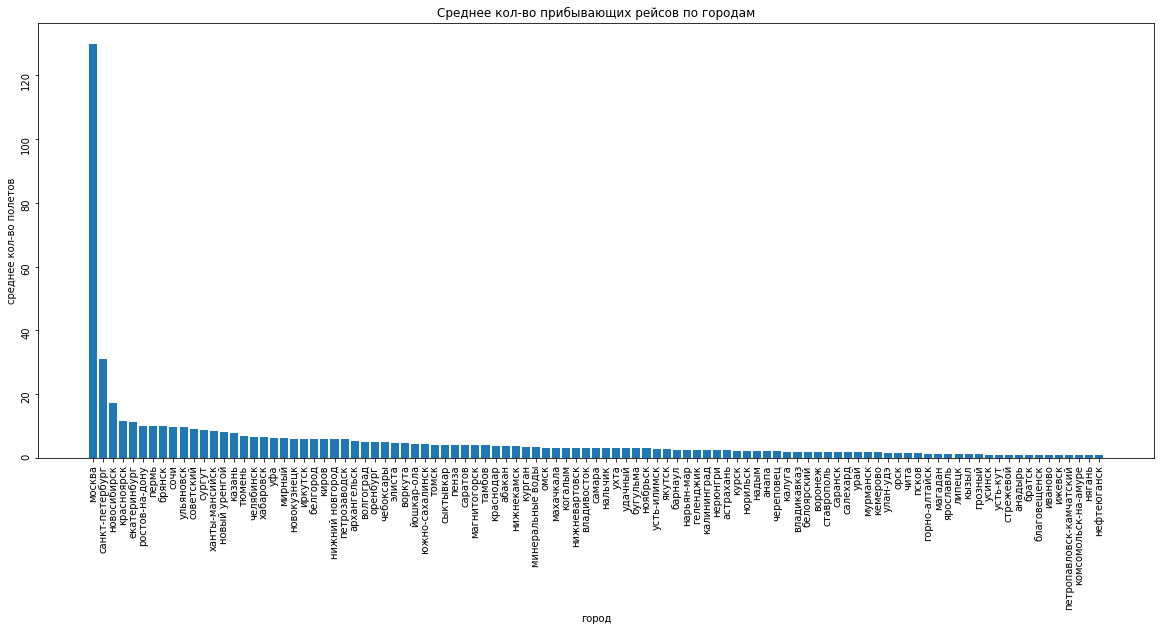

In [6]:
#график по городам
df_cities = df_cities.sort_values(by = 'average_flights', ascending = False)
fig, ax = plt.subplots()
ax.bar(df_cities['city'], df_cities['average_flights'])
fig.set_size_inches(20, 8)
ax.set_xlabel('город')
ax.set_ylabel('среднее кол-во полетов')
ax.tick_params(labelrotation = 90, labelsize = 10)
ax.set(title='Среднее кол-во прибывающих рейсов по городам')
plt.show()
#df_cities.plot(kind = 'bar', x = 'city', y='average_flights', figsize = (20,8),  title = 'Среднее кол-во рейсов по городам')

In [7]:
# выгрузка TOP10 городов
df_cities_TOP10 = df_cities.sort_values(by = 'average_flights', ascending = False).head(10)
display(df_cities_TOP10)

,city,average_flights
43,москва,129.774194
70,санкт-петербург,31.161290
54,новосибирск,17.322581
33,красноярск,11.580645
20,екатеринбург,11.322581
67,ростов-на-дону,10.193548
63,пермь,10.129032
10,брянск,10.000000
74,сочи,9.612903
84,ульяновск,9.580645


,кол-во рейсов
manufacturer,
airbus,1567
boeing,1530
bombardier,4446
cessna,4557
sukhoi,4185


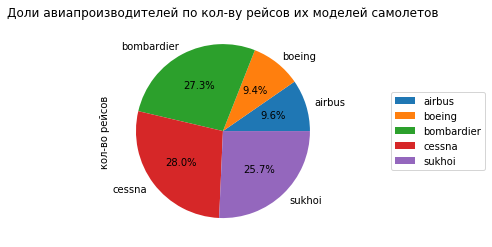

In [16]:
# объединение самолетов по производителям
# функция добавления столбца производителя по первому слову из строки 
def manufacturer(row):
        producer = re.search('\w+', row).group()
        return producer    
df_models['manufacturer'] = df_models['model'].apply(manufacturer)

#грппировка по производителю и суммирование рейсов
df_models_consolidated = df_models[['flights_amount', 'manufacturer']].groupby('manufacturer').sum()
df_models_consolidated.columns = ['кол-во рейсов']
display(df_models_consolidated)

#круговая диаграмма по рейсам в разрезе производителей
df_models_consolidated.plot(y='кол-во рейсов', kind='pie', autopct='%1.1f%%')
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Доли авиапроизводителей по кол-ву рейсов их моделей самолетов')
plt.show()

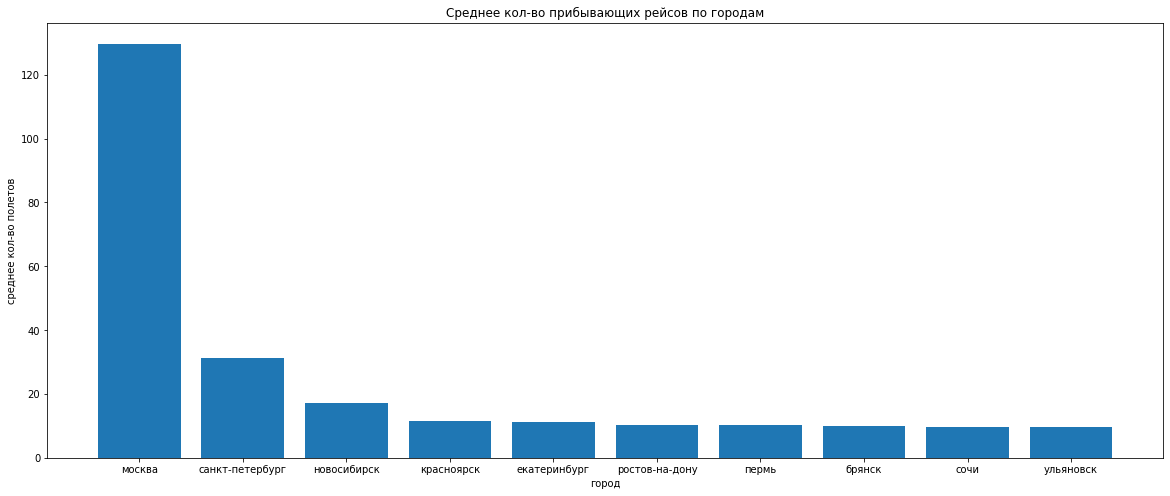

In [9]:
# график по TOP10 городам
fig, ax = plt.subplots()
ax.bar(df_cities_TOP10['city'], df_cities_TOP10['average_flights'])
fig.set_size_inches(20, 8)
ax.set_xlabel('город')
ax.set_ylabel('среднее кол-во полетов')
ax.set(title='Среднее кол-во прибывающих рейсов по городам')
plt.show()

### Вывод
**Города**

В TOP10 городов по среднему кол-ву прибывающих рейсов первые места занимают: Москва и Санкт-Петербург - столицы с большим кол-вом международных направлений. Далее следуют города-миллионеры Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь. 

Судя по тому, что в TOP3 из миллионников со значительным отрывом от остальных входит Новосибирск то, можно предположить, что компанией предпочитают пользоваться клиенты вылетающие в Сибирь (что характерно для реальной компании с созвучным названием, имеющей хаб в Новосибирске)

**Самолеты**

Модели используемых самолетов по рейсам можно условно разделить на три группы 40% (ближне и среднемагистральные самолеты Boeing, Airbus, Sukhoi), региональные самолеты (Bombardier) около 30% и легкие самолеты для местных коротких перелетов (Cessna)

## Общий вывод

### Резюме по подготовке данных

- Пропусков в данных не обнаружено
- Типы данных корректны

### Результаты исследования

- В TOP3 городов по предпочтениям клиентов входят: Москва, Санкт-Петербург и Новосибирск со значительной разницей в среднем кол-ве. Далее среднее кол-во рейсов убывает достаточно плавно.
- По моделям около 60% перелетов приходится на региональные и местные рейсы с соответствующими моделями самолетов Bombardier и Cessna
- Среди ближне- и среднемагистральных моделей преобладает Sukhoi SuperJet-100 (25,7%), а доли Boeing и Airbus примерно равны (около 9,5% каждый)

### Рекомендации

Целесообразно обратить внимание на достаточно высокую долю легких моделей самолетов Cessna для коротких перелетов (30%) для более глубокого анализа предпочтений клиентов и направлений их использований.